In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json
from pandas.io.json import json_normalize
import warnings
warnings.filterwarnings('ignore')


In [2]:
#open and loading the anonymized_project file
with open('data/anonymized_project.json') as f:
    j = json.load(f)
data=j['results']['root_node']['results']


In [3]:
result=[]
#data=j['results']['root_node']['results']
for i in data:
    result.append(i)
len(result)   
        
    

9087

In [4]:
#data

In [5]:
# normalize data.values and explode the dicts out of the lists
data=j['results']['root_node']['results']
df = pd.json_normalize(data.values()).apply(pd.Series.explode).reset_index(drop=True)
df

,results,gui_type
0,{'task_input': {'image_url': 'https://qm-auto-...,discrete_answer
1,{'task_input': {'image_url': 'https://qm-auto-...,discrete_answer
2,{'task_input': {'image_url': 'https://qm-auto-...,discrete_answer
3,{'task_input': {'image_url': 'https://qm-auto-...,discrete_answer
4,{'task_input': {'image_url': 'https://qm-auto-...,discrete_answer
...,...,...
90865,{'task_input': {'image_url': 'https://qm-auto-...,discrete_answer
90866,{'task_input': {'image_url': 'https://qm-auto-...,discrete_answer
90867,{'task_input': {'image_url': 'https://qm-auto-...,discrete_answer
90868,{'task_input': {'image_url': 'https://qm-auto-...,discrete_answer


In [6]:
# remove and normalize the column of dictionaries, and join the result to df
df = df.join(pd.json_normalize(df.pop('results')))
df

,gui_type,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,project_root_node_input_id,task_input.image_url,task_output.answer,task_output.cant_solve,task_output.corrupt_data,task_output.duration_ms,user.vendor_id,user.id,user.vendor_user_id,root_input.image_url
0,discrete_answer,2021-02-25T14:08:11.319438+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0000439a-96ac-4bd4-8753-a4baa229ecf2,7e8984b6-dff7-4015-865a-b721a2faf681,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,997,vendor_01,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,https://qm-auto-annotator.s3.eu-central-1.amaz...
1,discrete_answer,2021-02-25T13:14:39.411149+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0488b469-7c5f-459a-bfcb-ed94957c09c2,7e8984b6-dff7-4015-865a-b721a2faf681,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,845,vendor_01,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,annotator_11,https://qm-auto-annotator.s3.eu-central-1.amaz...
2,discrete_answer,2021-02-25T15:19:57.889434+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,323902a9-3b41-4885-8796-4e393aa2e0a0,7e8984b6-dff7-4015-865a-b721a2faf681,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,1468,vendor_01,780c974e-6ce7-4f1d-9afe-56bf96753fca,annotator_22,https://qm-auto-annotator.s3.eu-central-1.amaz...
3,discrete_answer,2021-02-26T03:56:18.770331+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,4222ac20-7aaa-4b07-bb2b-4423bf41eefe,7e8984b6-dff7-4015-865a-b721a2faf681,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,1062,vendor_01,94afdf79-917c-4904-bdaa-7a121f33b0ff,annotator_17,https://qm-auto-annotator.s3.eu-central-1.amaz...
4,discrete_answer,2021-02-25T15:39:06.644705+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,42ba767f-5bd1-4e62-aff1-4e716fd23623,7e8984b6-dff7-4015-865a-b721a2faf681,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,879,vendor_01,37a6036c-a9ef-4fcb-b554-7058f00415db,annotator_02,https://qm-auto-annotator.s3.eu-central-1.amaz...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90865,discrete_answer,2021-02-25T14:50:17.777598+00:00,5,0.0,3db139c1-7fec-44b3-b770-a790bfcff241,c15c69ca-fd11-49b2-b198-d998ed1d6909,3db139c1-7fec-44b3-b770-a790bfcff241,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,2690,vendor_01,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,https://qm-auto-annotator.s3.eu-central-1.amaz...
90866,discrete_answer,2021-02-26T04:11:29.015906+00:00,5,0.0,3db139c1-7fec-44b3-b770-a790bfcff241,e7674678-572c-4fbb-b0dd-7e43bbc6cfad,3db139c1-7fec-44b3-b770-a790bfcff241,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1407,vendor_01,66d63556-1235-4a5e-accc-651cb2993db4,annotator_16,https://qm-auto-annotator.s3.eu-central-1.amaz...
90867,discrete_answer,2021-02-25T13:58:18.253317+00:00,5,0.0,3db139c1-7fec-44b3-b770-a790bfcff241,ee448bd3-a93e-4586-a5a7-e3722b052d9a,3db139c1-7fec-44b3-b770-a790bfcff241,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1293,vendor_01,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,https://qm-auto-annotator.s3.eu-central-1.amaz...
90868,discrete_answer,2021-02-25T13:02:51.311501+00:00,5,0.0,3db139c1-7fec-44b3-b770-a790bfcff241,f2859473-b7a0-4c55-b5d9-ee80fa4a75a9,3db139c1-7fec-44b3-b770-a790bfcff241,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1306,vendor_01,9fddf227-6680-42f5-aca5-533fc439c193,annotator_04,https://qm-auto-annotator.s3.eu-central-1.amaz...


In [7]:
#find duplicate rows across all columns
df.project_node_input_id.value_counts()

7e8984b6-dff7-4015-865a-b721a2faf681    10
9153693c-94ae-4005-9df0-0482445c342f    10
a9884010-3aa2-4646-af57-920e8fbdd81d    10
ff14b696-efdb-4aa6-8163-deb9c1a8eb36    10
d8719a33-0387-4a2f-9b2e-8487dd87e121    10
                                        ..
87ef6702-9308-4b19-9926-63a2d23114cd    10
2199024b-eb60-4585-9d77-9cfb064bb0bb    10
7b30f924-c1ed-402b-9466-5b737cf820fc    10
abe9e78f-1142-4773-9df3-5de7b0634af8    10
3db139c1-7fec-44b3-b770-a790bfcff241    10
Name: project_node_input_id, Length: 9087, dtype: int64

In [8]:
#here we should drop project_node_input_id' record from the df, here i assume the input id should be unique
df = df.drop_duplicates(subset='project_node_input_id', keep="first")
df

,gui_type,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,project_root_node_input_id,task_input.image_url,task_output.answer,task_output.cant_solve,task_output.corrupt_data,task_output.duration_ms,user.vendor_id,user.id,user.vendor_user_id,root_input.image_url
0,discrete_answer,2021-02-25T14:08:11.319438+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0000439a-96ac-4bd4-8753-a4baa229ecf2,7e8984b6-dff7-4015-865a-b721a2faf681,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,997,vendor_01,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,https://qm-auto-annotator.s3.eu-central-1.amaz...
10,discrete_answer,2021-02-25T13:53:31.698130+00:00,5,0.0,9d8a2527-accb-40bd-90d8-a73f20a609be,0000de80-97c8-40f4-aee1-f30377174381,9d8a2527-accb-40bd-90d8-a73f20a609be,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1044,vendor_01,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,annotator_11,https://qm-auto-annotator.s3.eu-central-1.amaz...
20,discrete_answer,2021-02-25T13:35:02.076869+00:00,5,0.0,0625d00c-96c3-41ad-9324-37037ffd0325,00023262-3608-4678-8d3f-142e6758fadb,0625d00c-96c3-41ad-9324-37037ffd0325,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,848,vendor_01,e336139c-5228-42cd-b501-81855532dfa6,annotator_05,https://qm-auto-annotator.s3.eu-central-1.amaz...
30,discrete_answer,2021-02-26T03:53:40.752056+00:00,5,0.0,a7c5595d-0ee0-4dea-bf6b-7ee3fb42d0e7,00036ee9-f7da-4753-9607-7df7b57d4623,a7c5595d-0ee0-4dea-bf6b-7ee3fb42d0e7,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,1077,vendor_01,5765cc32-9e32-43e1-bd78-384cfd52d55a,annotator_06,https://qm-auto-annotator.s3.eu-central-1.amaz...
40,discrete_answer,2021-02-25T10:19:19.501386+00:00,5,0.0,363aaded-07f3-41b1-8c84-4bae83406757,000468b7-a24c-435c-b506-9db1bf3c700d,363aaded-07f3-41b1-8c84-4bae83406757,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1742,vendor_01,0e606b41-ebe4-4d7d-996c-db910c84971a,annotator_20,https://qm-auto-annotator.s3.eu-central-1.amaz...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90820,discrete_answer,2021-02-26T04:06:28.213617+00:00,5,0.0,0ea47243-a5ba-4bea-a61e-632ca41ab503,8c3b0939-0ea0-4326-b32c-525e026f74d4,0ea47243-a5ba-4bea-a61e-632ca41ab503,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,918,vendor_01,32971d11-e972-4d73-99a6-0847e1261995,annotator_18,https://qm-auto-annotator.s3.eu-central-1.amaz...
90830,discrete_answer,2021-02-25T12:50:45.388598+00:00,5,0.0,9ac9d365-9dd7-44fc-9e3e-5772110bb217,8df11808-4d11-49b7-97ff-3a61f618f45c,9ac9d365-9dd7-44fc-9e3e-5772110bb217,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1415,vendor_01,6d8be901-c6a6-43f8-a5ac-8e44b924bd84,annotator_09,https://qm-auto-annotator.s3.eu-central-1.amaz...
90840,discrete_answer,2021-02-25T15:10:56.190173+00:00,5,0.0,bf4f4d43-de3b-46ef-8ed4-4d04d4641187,92ccde6e-1302-40e1-9f82-454179b7f1ae,bf4f4d43-de3b-46ef-8ed4-4d04d4641187,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1047,vendor_01,37a6036c-a9ef-4fcb-b554-7058f00415db,annotator_02,https://qm-auto-annotator.s3.eu-central-1.amaz...
90850,discrete_answer,2021-02-25T14:42:36.468576+00:00,5,0.0,cfa36c30-31ab-4647-bbc0-7e505db482ac,93799099-e674-43c3-a3e8-d8b872aad0eb,cfa36c30-31ab-4647-bbc0-7e505db482ac,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,911,vendor_01,6d8be901-c6a6-43f8-a5ac-8e44b924bd84,annotator_09,https://qm-auto-annotator.s3.eu-central-1.amaz...


In [9]:
with open('data/references.json') as f:
    j1 = json.load(f)

In [10]:
df1 = pd.json_normalize(j1).T
df1

,0
img_4686.is_bicycle,False
img_8607.is_bicycle,True
img_5541.is_bicycle,False
img_3218.is_bicycle,False
img_3247.is_bicycle,True
...,...
img_5282.is_bicycle,True
img_0628.is_bicycle,True
img_7736.is_bicycle,True
img_1042.is_bicycle,False


In [11]:
df1=pd.json_normalize(j1,max_level=0).T
df1

,0
img_4686,{'is_bicycle': False}
img_8607,{'is_bicycle': True}
img_5541,{'is_bicycle': False}
img_3218,{'is_bicycle': False}
img_3247,{'is_bicycle': True}
...,...
img_5282,{'is_bicycle': True}
img_0628,{'is_bicycle': True}
img_7736,{'is_bicycle': True}
img_1042,{'is_bicycle': False}


In [12]:
df1.columns=['result']
df1

,result
img_4686,{'is_bicycle': False}
img_8607,{'is_bicycle': True}
img_5541,{'is_bicycle': False}
img_3218,{'is_bicycle': False}
img_3247,{'is_bicycle': True}
...,...
img_5282,{'is_bicycle': True}
img_0628,{'is_bicycle': True}
img_7736,{'is_bicycle': True}
img_1042,{'is_bicycle': False}


In [13]:
# Create a new column with index values
#df1['img'] = df1.index

#using reset_index() to set index into column
df2=df1.reset_index()
df2=df2.rename(columns={'index':'img'})
df2=pd.concat([df2.drop(['result'], axis=1), df2['result'].apply(pd.Series)], axis=1)
df2

,img,is_bicycle
0,img_4686,False
1,img_8607,True
2,img_5541,False
3,img_3218,False
4,img_3247,True
...,...,...
9082,img_5282,True
9083,img_0628,True
9084,img_7736,True
9085,img_1042,False


In [14]:
df_new=df.join(df2).reset_index(drop=True)
df_new.head()

,gui_type,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,project_root_node_input_id,task_input.image_url,task_output.answer,task_output.cant_solve,task_output.corrupt_data,task_output.duration_ms,user.vendor_id,user.id,user.vendor_user_id,root_input.image_url,img,is_bicycle
0,discrete_answer,2021-02-25T14:08:11.319438+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0000439a-96ac-4bd4-8753-a4baa229ecf2,7e8984b6-dff7-4015-865a-b721a2faf681,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,997,vendor_01,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,https://qm-auto-annotator.s3.eu-central-1.amaz...,img_4686,False
1,discrete_answer,2021-02-25T13:53:31.698130+00:00,5,0.0,9d8a2527-accb-40bd-90d8-a73f20a609be,0000de80-97c8-40f4-aee1-f30377174381,9d8a2527-accb-40bd-90d8-a73f20a609be,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1044,vendor_01,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,annotator_11,https://qm-auto-annotator.s3.eu-central-1.amaz...,img_3779,False
2,discrete_answer,2021-02-25T13:35:02.076869+00:00,5,0.0,0625d00c-96c3-41ad-9324-37037ffd0325,00023262-3608-4678-8d3f-142e6758fadb,0625d00c-96c3-41ad-9324-37037ffd0325,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,848,vendor_01,e336139c-5228-42cd-b501-81855532dfa6,annotator_05,https://qm-auto-annotator.s3.eu-central-1.amaz...,img_1546,True
3,discrete_answer,2021-02-26T03:53:40.752056+00:00,5,0.0,a7c5595d-0ee0-4dea-bf6b-7ee3fb42d0e7,00036ee9-f7da-4753-9607-7df7b57d4623,a7c5595d-0ee0-4dea-bf6b-7ee3fb42d0e7,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,1077,vendor_01,5765cc32-9e32-43e1-bd78-384cfd52d55a,annotator_06,https://qm-auto-annotator.s3.eu-central-1.amaz...,img_3780,False
4,discrete_answer,2021-02-25T10:19:19.501386+00:00,5,0.0,363aaded-07f3-41b1-8c84-4bae83406757,000468b7-a24c-435c-b506-9db1bf3c700d,363aaded-07f3-41b1-8c84-4bae83406757,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1742,vendor_01,0e606b41-ebe4-4d7d-996c-db910c84971a,annotator_20,https://qm-auto-annotator.s3.eu-central-1.amaz...,img_8789,True


In [15]:
df_new.shape

(9087, 18)

In [16]:
df_new.to_csv('data/finaldata.csv')

In [51]:
df_new=pd.read_csv('data/finaldata.csv')

In [54]:
df_new.reset_index(drop=True)
df_new.drop(columns='Unnamed: 0',inplace=True)
df_new.shape

(9087, 18)

- The file contains 9087 records and 16 features.

### Data Cleaning and Preprossing

#### gui_type feature

In [56]:
df_new.gui_type.value_counts()

discrete_answer    9087
Name: gui_type, dtype: int64

- There is only one type of answer with 'gui_type'  so it will not help to us to anaysis data.
- 'task_input.image_url' and 'root_input.image_url' also not help for further data analysis.
 ### checking feature value dupication

In [57]:
df_new['project_node_input_id'].equals(df_new['project_root_node_input_id'])

True

##### Here 'project_node_input_id' column is duplicated with 'project_root_node_input_id' column,so decided to drop one of them.

In [58]:
df_new['task_output.cant_solve'].equals(df_new['task_output.corrupt_data'])

False

In [59]:
df_new['task_output.cant_solve'].value_counts()

False    9085
True        2
Name: task_output.cant_solve, dtype: int64

In [60]:
df_new['task_output.corrupt_data'].value_counts()

False    9087
Name: task_output.corrupt_data, dtype: int64

- Here 'task_output.corrupt_data' have only one category 'False' ,so data is not correpted.

In [61]:
df_new.img.isnull().sum()

8178

In [62]:
df_new['is_bicycle'].isnull().sum()

8178

In [63]:
df_new['user.vendor_user_id'].isnull().sum()

0

In [64]:
df_new['user.vendor_id'].value_counts()

vendor_01    9087
Name: user.vendor_id, dtype: int64

- Here 'user.vendor_id' have only one category,it will not help much for analysis ,decided to drop.

In [65]:
df_new['workpackage_total_size'].value_counts()


5    9082
1       2
2       2
3       1
Name: workpackage_total_size, dtype: int64

In [66]:
df_new['loss'].value_counts()

0.0    9087
Name: loss, dtype: int64

- Here 'Loss' column  also not giving much infromation,so decided to drop.

In [67]:
df_new['task_output.answer'].value_counts()


yes    4618
no     4467
Name: task_output.answer, dtype: int64

- Here the task out put almost eqally distributed.

In [68]:
df_new.loc[(df_new['task_output.answer']!='yes') & (df_new['task_output.answer'] != 'no')]

,gui_type,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,project_root_node_input_id,task_input.image_url,task_output.answer,task_output.cant_solve,task_output.corrupt_data,task_output.duration_ms,user.vendor_id,user.id,user.vendor_user_id,root_input.image_url,img,is_bicycle
7024,discrete_answer,2021-02-25T13:16:11.077555+00:00,5,0.0,035315c3-ef9b-47c9-b48a-a6dca661b38c,234248a6-016b-451d-9e77-110ae1e7c92f,035315c3-ef9b-47c9-b48a-a6dca661b38c,https://qm-auto-annotator.s3.eu-central-1.amaz...,NaN,True,False,746,vendor_01,9fddf227-6680-42f5-aca5-533fc439c193,annotator_04,https://qm-auto-annotator.s3.eu-central-1.amaz...,NaN,NaN
8710,discrete_answer,2021-02-25T10:10:08.355604+00:00,5,0.0,bc616814-9d98-4c9f-afcb-d921d166653a,46f706a4-39ad-443a-ba86-b23ec8a56cd4,bc616814-9d98-4c9f-afcb-d921d166653a,https://qm-auto-annotator.s3.eu-central-1.amaz...,NaN,True,False,783,vendor_01,0e606b41-ebe4-4d7d-996c-db910c84971a,annotator_20,https://qm-auto-annotator.s3.eu-central-1.amaz...,NaN,NaN


In [69]:
df_new.loc[df_new['task_output.answer'] == '', 'task_output.answer'] = 'cant_solve&corrupt_data'
task_df=df_new.loc[(df_new['task_output.answer']!='yes') & (df_new['task_output.answer'] != 'no')].reset_index()
task_df.groupby('user.vendor_id')[['task_output.answer','task_output.cant_solve','task_output.corrupt_data']].sum()

,task_output.cant_solve,task_output.corrupt_data
user.vendor_id,,
vendor_01,2,0


#### Insights:
- There is no case with  corrupted data.Only two cases can't solved by some other reasons.


#### Dropping unnecessary columns

In [70]:
df = df_new.drop(columns=['gui_type', 'task_input.image_url','root_input.image_url','project_root_node_input_id',
                          'user.vendor_id','loss','project_node_input_id',
                          'project_node_output_id','img'],axis=1)
df.head()

,created_at,workpackage_total_size,task_output.answer,task_output.cant_solve,task_output.corrupt_data,task_output.duration_ms,user.id,user.vendor_user_id,is_bicycle
0,2021-02-25T14:08:11.319438+00:00,5,no,False,False,997,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,False
1,2021-02-25T13:53:31.698130+00:00,5,yes,False,False,1044,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,annotator_11,False
2,2021-02-25T13:35:02.076869+00:00,5,no,False,False,848,e336139c-5228-42cd-b501-81855532dfa6,annotator_05,True
3,2021-02-26T03:53:40.752056+00:00,5,no,False,False,1077,5765cc32-9e32-43e1-bd78-384cfd52d55a,annotator_06,False
4,2021-02-25T10:19:19.501386+00:00,5,yes,False,False,1742,0e606b41-ebe4-4d7d-996c-db910c84971a,annotator_20,True


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9087 entries, 0 to 9086
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   created_at                9087 non-null   object
 1   workpackage_total_size    9087 non-null   int64 
 2   task_output.answer        9085 non-null   object
 3   task_output.cant_solve    9087 non-null   bool  
 4   task_output.corrupt_data  9087 non-null   bool  
 5   task_output.duration_ms   9087 non-null   int64 
 6   user.id                   9087 non-null   object
 7   user.vendor_user_id       9087 non-null   object
 8   is_bicycle                909 non-null    object
dtypes: bool(2), int64(2), object(5)
memory usage: 514.8+ KB


In [72]:
#  Print the columns with missing values
[col for col in df.columns if df[col].isnull().any()]

['task_output.answer', 'is_bicycle']

<Axes: >

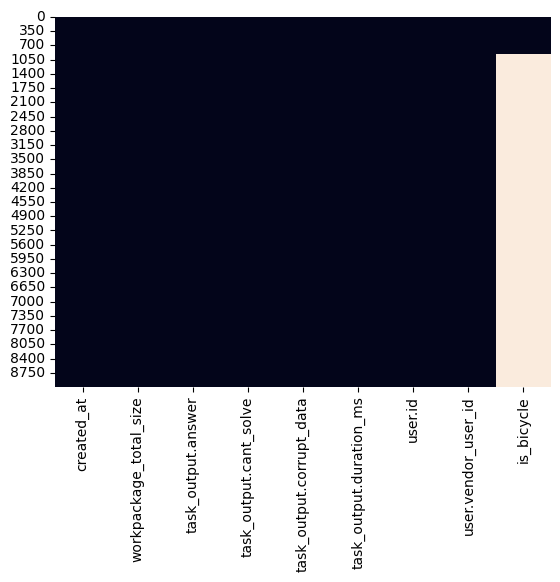

In [67]:
sns.heatmap(df.isnull(), cbar=False)

#### Insights:
There is only is_bicycle column have null values

#### filling null values with zero

In [73]:
df=df.replace(np.nan,0)
df.isnull().sum()

created_at                  0
workpackage_total_size      0
task_output.answer          0
task_output.cant_solve      0
task_output.corrupt_data    0
task_output.duration_ms     0
user.id                     0
user.vendor_user_id         0
is_bicycle                  0
dtype: int64

### Converting 'created_at'  columns to date time format

In [74]:
df['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format=True)
#df['task_output.duration_ms'] = pd.to_time(df['task_output.duration_ms'], unit = 'ms')
#df['task_output.duration_ms'] = pd.to_timedelta(df['task_output.duration_ms'])
#df['task_output.duration_ms']=df['task_output.duration_ms'].strftime('%s%f')[:-3]
df

,created_at,workpackage_total_size,task_output.answer,task_output.cant_solve,task_output.corrupt_data,task_output.duration_ms,user.id,user.vendor_user_id,is_bicycle
0,2021-02-25 14:08:11.319438+00:00,5,no,False,False,997,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,False
1,2021-02-25 13:53:31.698130+00:00,5,yes,False,False,1044,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,annotator_11,False
2,2021-02-25 13:35:02.076869+00:00,5,no,False,False,848,e336139c-5228-42cd-b501-81855532dfa6,annotator_05,True
3,2021-02-26 03:53:40.752056+00:00,5,no,False,False,1077,5765cc32-9e32-43e1-bd78-384cfd52d55a,annotator_06,False
4,2021-02-25 10:19:19.501386+00:00,5,yes,False,False,1742,0e606b41-ebe4-4d7d-996c-db910c84971a,annotator_20,True
...,...,...,...,...,...,...,...,...,...
9082,2021-02-26 04:06:28.213617+00:00,5,yes,False,False,918,32971d11-e972-4d73-99a6-0847e1261995,annotator_18,0
9083,2021-02-25 12:50:45.388598+00:00,5,yes,False,False,1415,6d8be901-c6a6-43f8-a5ac-8e44b924bd84,annotator_09,0
9084,2021-02-25 15:10:56.190173+00:00,5,yes,False,False,1047,37a6036c-a9ef-4fcb-b554-7058f00415db,annotator_02,0
9085,2021-02-25 14:42:36.468576+00:00,5,no,False,False,911,6d8be901-c6a6-43f8-a5ac-8e44b924bd84,annotator_09,0


In [75]:
df['user.vendor_user_id'].value_counts().count()

22

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9087 entries, 0 to 9086
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   created_at                9087 non-null   datetime64[ns, UTC]
 1   workpackage_total_size    9087 non-null   int64              
 2   task_output.answer        9087 non-null   object             
 3   task_output.cant_solve    9087 non-null   bool               
 4   task_output.corrupt_data  9087 non-null   bool               
 5   task_output.duration_ms   9087 non-null   int64              
 6   user.id                   9087 non-null   object             
 7   user.vendor_user_id       9087 non-null   object             
 8   is_bicycle                9087 non-null   object             
dtypes: bool(2), datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 514.8+ KB


### Tasks
#### 1. Gather insights about the annotators:
 #### - a.  How many annotators did contribute to the dataset?

In [76]:
a=df['user.vendor_user_id'].value_counts().count()
print('The total annotators are contributing to the datase:', a)

The total annotators are contributing to the datase: 22


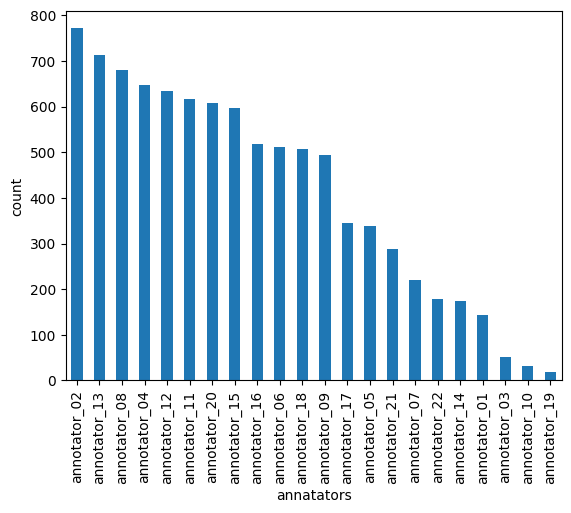

In [53]:
df['user.vendor_user_id'].value_counts().plot(kind='bar')
plt.xlabel('annatators')
plt.ylabel('count')
 # Show graph
plt.show()

In [98]:
df_annot=df['user.vendor_user_id'].value_counts().to_frame().reset_index().rename(columns={'index':'annotator'})
df_annot

                 

,annotator,user.vendor_user_id
0,annotator_02,771
1,annotator_13,712
2,annotator_08,681
3,annotator_04,647
4,annotator_12,634
5,annotator_11,617
6,annotator_20,607
7,annotator_15,597
8,annotator_16,517
9,annotator_06,512


#### Insights from annotators class
- There are 22 annotators in total
-  The heighest number of jobs(771jobs) done by 'annotator-2' and the less work done by 'annotator-19(19jobs)'.




#### 1.b. What are the average, min and max annotation times (durations)? Feel free toadd visual representations here such as graphs if you like.

In [100]:
df.head()

,created_at,workpackage_total_size,task_output.answer,task_output.cant_solve,task_output.corrupt_data,task_output.duration_ms,user.id,user.vendor_user_id,is_bicycle
0,2021-02-25 14:08:11.319438+00:00,5,no,False,False,997,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,False
1,2021-02-25 13:53:31.698130+00:00,5,yes,False,False,1044,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,annotator_11,False
2,2021-02-25 13:35:02.076869+00:00,5,no,False,False,848,e336139c-5228-42cd-b501-81855532dfa6,annotator_05,True
3,2021-02-26 03:53:40.752056+00:00,5,no,False,False,1077,5765cc32-9e32-43e1-bd78-384cfd52d55a,annotator_06,False
4,2021-02-25 10:19:19.501386+00:00,5,yes,False,False,1742,0e606b41-ebe4-4d7d-996c-db910c84971a,annotator_20,True


In [120]:
#df.groupby('user.vendor_user_id')['task_output.duration_ms'].agg()
df_time = (df.assign(Data_Value=df['task_output.duration_ms'].abs())
       .groupby(['user.vendor_user_id','task_output.answer'])['task_output.duration_ms'].agg([('Min' , 'min'), ('Max', 'max'),('mean','mean')])
       .add_prefix('tasktime_')).reset_index().sort_values(['tasktime_Min', 'tasktime_Max','tasktime_mean'])
df_time

,user.vendor_user_id,task_output.answer,tasktime_Min,tasktime_Max,tasktime_mean
41,annotator_20,yes,70,7073,1156.683871
16,annotator_08,yes,166,14310,1336.164804
44,annotator_22,no,349,3300,932.373494
45,annotator_22,yes,407,2140,853.770833
22,annotator_11,yes,479,11079,1206.719298
20,annotator_10,yes,486,7302,1412.388889
21,annotator_11,no,486,10652,1298.903614
33,annotator_17,no,495,3583,1002.236181
43,annotator_21,yes,495,9999,1171.438356
40,annotator_20,no,519,7753,1204.388514


In [121]:
df_time[df_time.tasktime_Min==df_time.tasktime_Min.min()]

,user.vendor_user_id,task_output.answer,tasktime_Min,tasktime_Max,tasktime_mean
41,annotator_20,yes,70,7073,1156.683871


In [122]:
df_time[df_time.tasktime_Max==df_time.tasktime_Max.max()]

,user.vendor_user_id,task_output.answer,tasktime_Min,tasktime_Max,tasktime_mean
28,annotator_14,yes,694,24757,1669.402985


#### Insignts
- Form the above data annotator_20 took min time 70ms to complete the task and annotator_14 took max time 24757 mins to complete task.
- Both cases the output answer is 'yes'.

#### Lets see visually the max and min task time

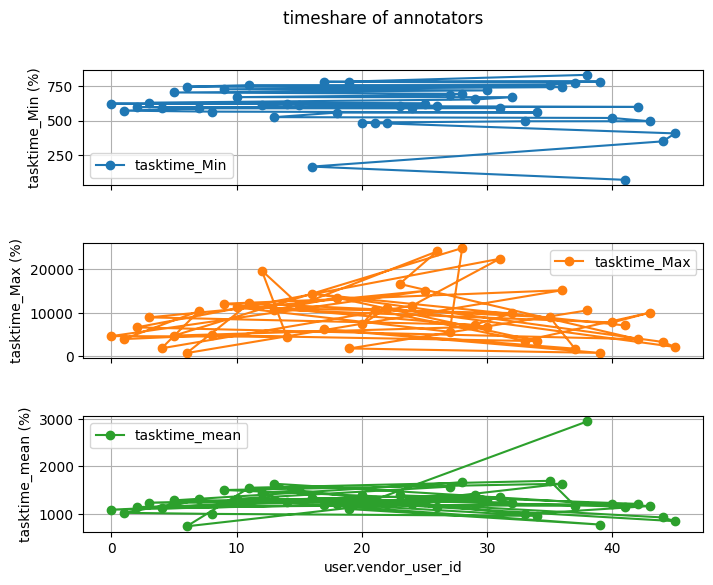

In [137]:
axes=df_time[['tasktime_Min','tasktime_Max','tasktime_mean']].plot(sharex=True,subplots=True,marker='o',
                                             title ="timeshare of annotators",
                                                         xlabel="user.vendor_user_id",
                                                         figsize = (8,6),
                                                         grid=True
                                                        );

plt.subplots_adjust(hspace=0.5) 
axes[0].set_ylabel('tasktime_Min (%)');
axes[1].set_ylabel('tasktime_Max (%)');
axes[2].set_ylabel('tasktime_mean (%)');

<Axes: xlabel='user.vendor_user_id'>

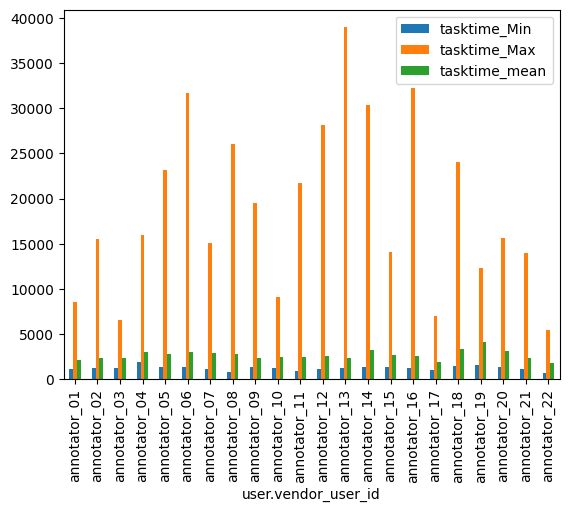

In [135]:
df_time.groupby(['user.vendor_user_id']).sum().plot(kind='bar')

#### 1.c. Did all annotators produce the same amount of results, or are there differences?

In [123]:
#annatator_percentage= (df['user.vendor_user_id']["task_output.answer"].value_counts(normalize=True)*100).sort_values(ascending=True).unstack()
#df1 = data.set_index("Start").select_dtypes(np.number).stack().groupby(level=0).describe() 
#(df.groupby([df['user.vendor_user_id']])["task_output.answer"].value_counts().unstack().reset_index().fillna(0))


Text(0, 0.5, 'Frequency')

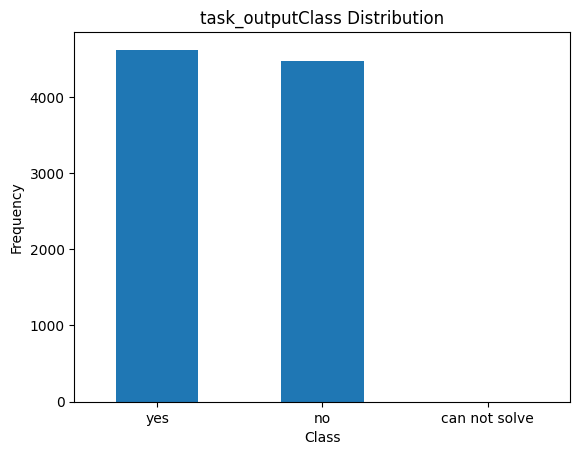

In [41]:
count_classes = pd.value_counts(df['task_output.answer'], sort = True)
LABELS = ["yes", "no","can not solve"]

count_classes.plot(kind = 'bar', rot=0)

plt.title("task_outputClass Distribution")

plt.xticks(range(3), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

#### 3. Is the reference set balanced? Please demonstrate via numbers and visualizations.

In [125]:
df['is_bicycle'].value_counts().to_frame()

,is_bicycle
False,8625
True,462


- From the above information the data is totally unbalanced.
- Lets see visually how data fall.

Text(0, 0.5, 'Frequency')

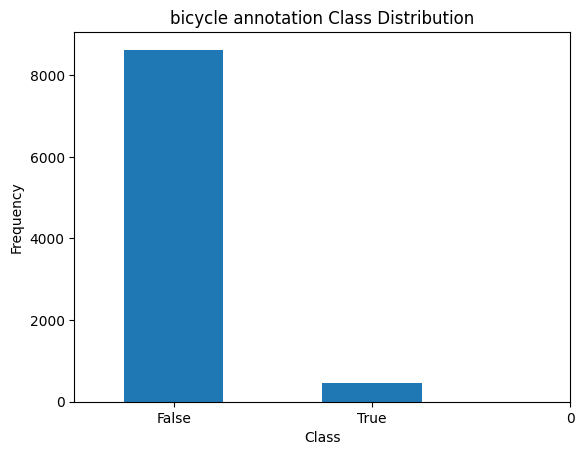

In [127]:
count_classes = pd.value_counts(df['is_bicycle'], sort = True)
LABELS = ["False","True","0"]

count_classes.plot(kind = 'bar', rot=0)

plt.title("bicycle annotation Class Distribution")

plt.xticks(range(3), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

([<matplotlib.patches.Wedge at 0x27a9c6ceb60>,
 [Text(-1.0859982625964437, 0.17495077489827143, 'False'),
  Text(1.085998258501425, -0.17495080031789562, 'True')],
 [Text(-0.5923626886889692, 0.09542769539905713, '94.9%\n8625'),
  Text(0.5923626864553226, -0.0954277092643067, '5.1%\n462')])

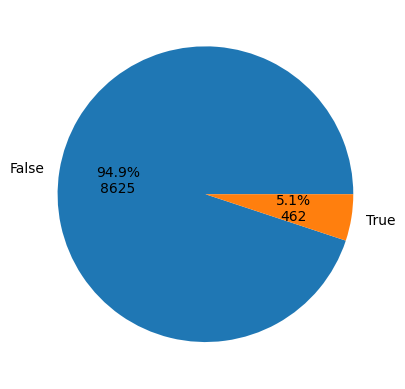

In [133]:
total = df['is_bicycle'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df['is_bicycle'].value_counts().values, labels=df['is_bicycle'].value_counts().index, autopct=fmt)

- If the dataframe has imbalanced classes, then In such cases, you get a pretty high accuracy just by predicting the majority class, but you fail to capture the minority class
- If the class distribution shows more than 90% of the data has the majority class, then any basic classification model like the logistic regression or decision tree will not be able to identify the minor class data points.

### Resampling Techniques to Solve Class Imbalance
One of the widely adopted class imbalance techniques for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

#### Disadvantages

- The over-sampling is to duplicate random records from the minority class, which can cause overfishing.

- In under-sampling, the simplest technique involves removing random records from the majority class, which can cause a loss of information.